In [2]:
%pip install pandas matplotlib seaborn yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# install all packages at once
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [4]:
# Define the ticker and date range
ticker = 'AAPL'
start_date = '2024-01-01'
end_date = '2025-11-11'

# Fetch data
data = yf.download(ticker, start=start_date, end=end_date)

# Reset index to make 'Date' a column
data.reset_index(inplace=True)

# Display the first few rows
print(data.head())

C:\Users\Programming\AppData\Local\Temp\ipykernel_1436\2611475865.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
0      2024-01-02  183.903244  186.677052  182.169616  185.399112  82488700
1      2024-01-03  182.526230  184.140985  181.713894  182.496512  58414500
2      2024-01-04  180.208130  181.377083  179.187767  180.445875  71983600
3      2024-01-05  179.484955  181.050175  178.484409  180.287390  62379700
4      2024-01-08  183.823975  183.863609  179.801961  180.386437  59144500


In [5]:
# Basic info
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        467 non-null    datetime64[ns]
 1   (Close, AAPL)   467 non-null    float64       
 2   (High, AAPL)    467 non-null    float64       
 3   (Low, AAPL)     467 non-null    float64       
 4   (Open, AAPL)    467 non-null    float64       
 5   (Volume, AAPL)  467 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 22.0 KB
None
Price                            Date       Close        High         Low  \
Ticker                                       AAPL        AAPL        AAPL   
count                             467  467.000000  467.000000  467.000000   
mean    2024-12-06 01:14:00.256959488  214.546200  216.616239  212.253547   
min               2024-01-02 00:00:00  163.664917  165.053583  162.752363   
25%               20

In [6]:
# Display the first few rows
print(data.head())

Price        Date       Close        High         Low        Open    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
0      2024-01-02  183.903244  186.677052  182.169616  185.399112  82488700
1      2024-01-03  182.526230  184.140985  181.713894  182.496512  58414500
2      2024-01-04  180.208130  181.377083  179.187767  180.445875  71983600
3      2024-01-05  179.484955  181.050175  178.484409  180.287390  62379700
4      2024-01-08  183.823975  183.863609  179.801961  180.386437  59144500


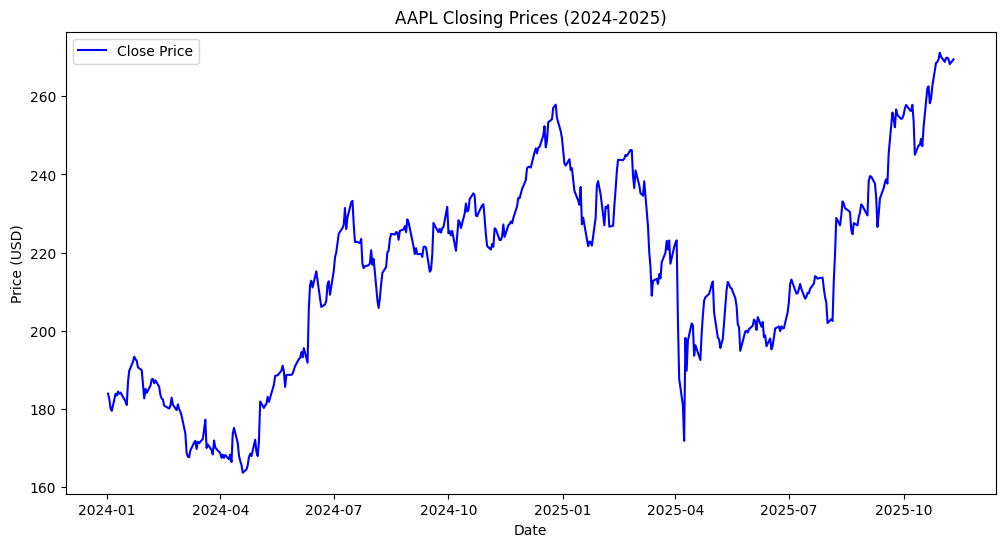

In [7]:
# convert into dataframe
data = pd.DataFrame(data)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('AAPL Closing Prices (2024-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

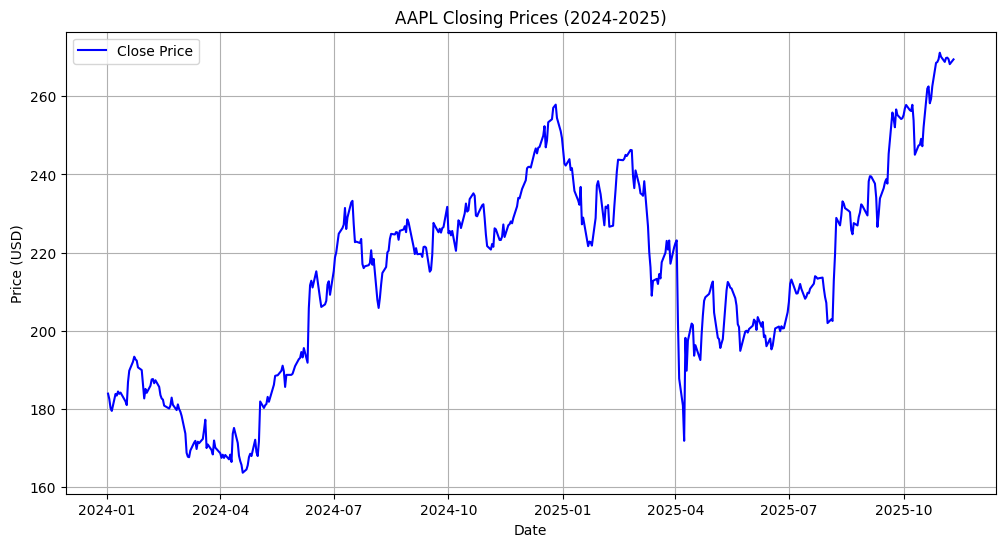

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('AAPL Closing Prices (2024-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

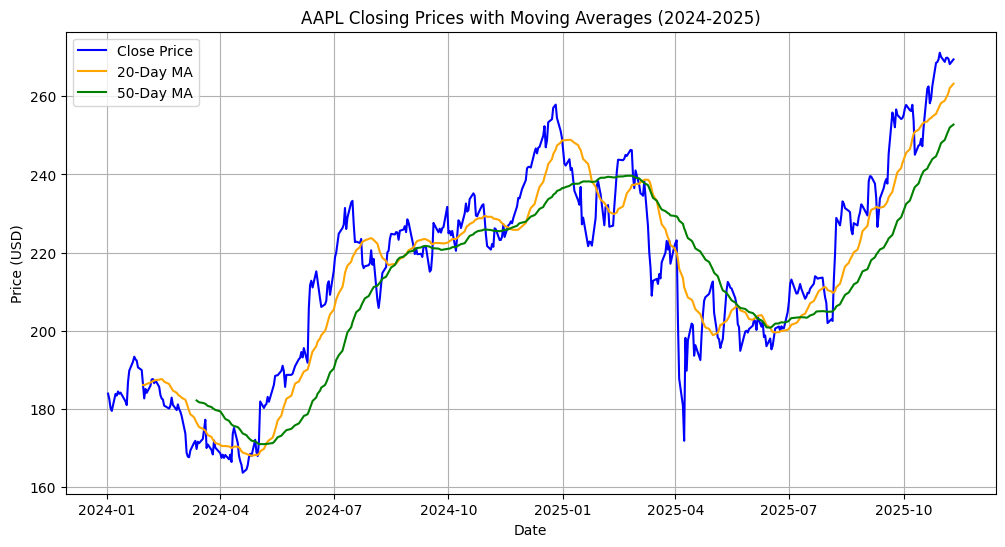

In [9]:

# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
# Plot closing prices with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA20'], label='20-Day MA', color='orange')
plt.plot(data['Date'], data['MA50'], label='50-Day MA', color='green')
plt.title('AAPL Closing Prices with Moving Averages (2024-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


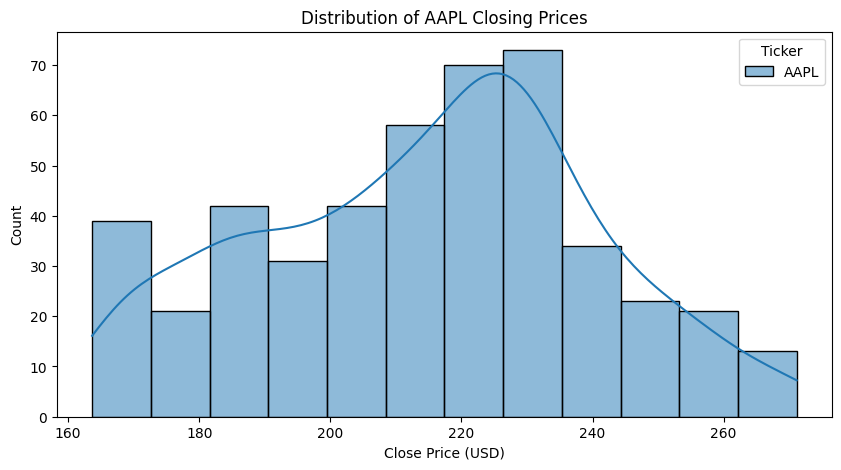

In [10]:
# Distribution of Closing Prices
plt.figure(figsize=(10, 5))
sns.histplot(data['Close'], kde=True, color='purple')
plt.title('Distribution of AAPL Closing Prices')
plt.xlabel('Close Price (USD)')
plt.show()

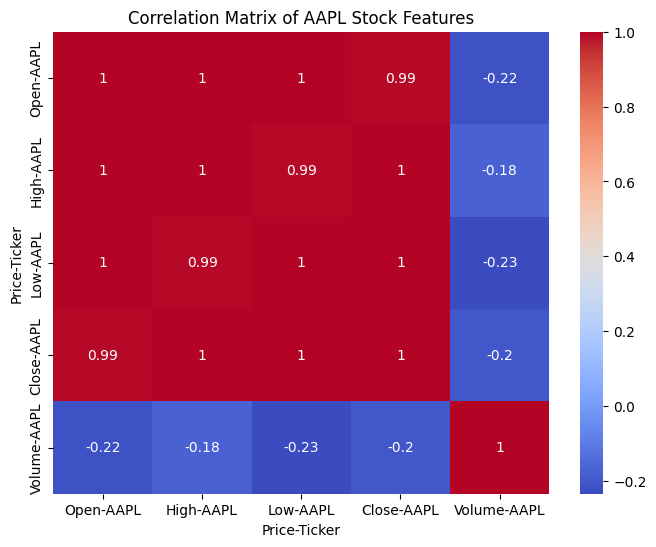

In [11]:
# Correlation Heatmap (select numerical columns)
numerical_data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
corr = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of AAPL Stock Features')
plt.show()

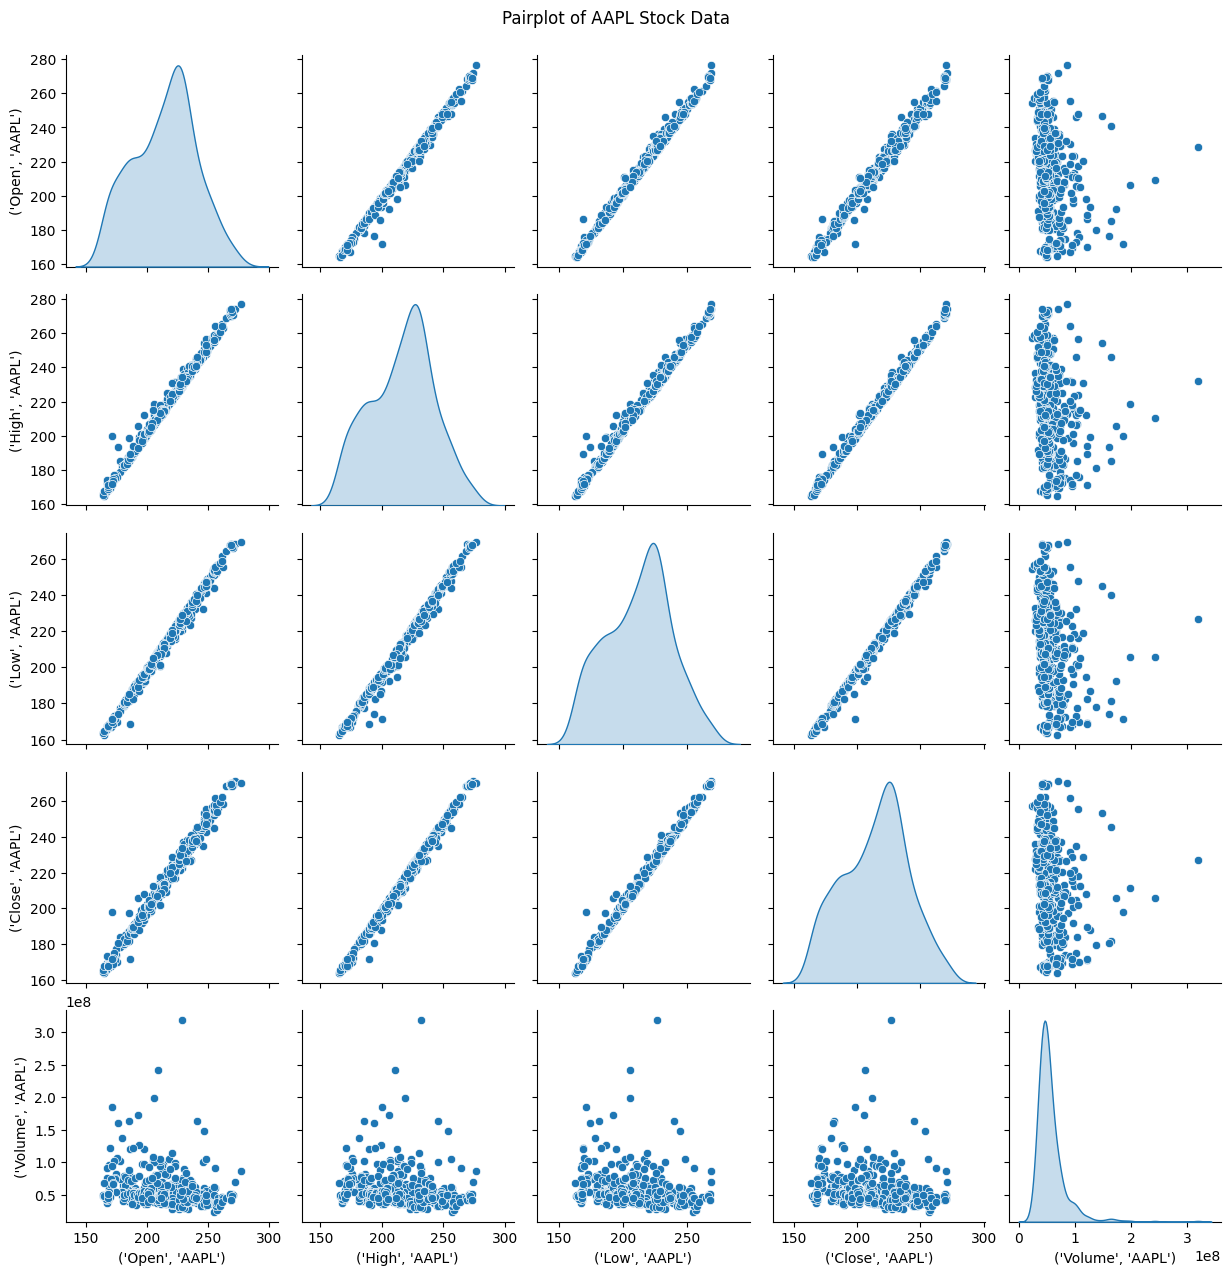

In [12]:
# Pairplot for relationships
sns.pairplot(numerical_data, diag_kind='kde')
plt.suptitle('Pairplot of AAPL Stock Data', y=1.02)
plt.show()

In [13]:
# Calculate RSI Using Pandas

# Step 7: Calculate 14-day RSI
def calculate_rsi(data, period=14):
    # Calculate daily price changes
    delta = data['Close'].diff()
    
    # Separate gains and losses
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    
    # Calculate RS (Relative Strength)
    rs = gain / loss
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Apply RSI
data['RSI_14'] = calculate_rsi(data, period=14)

# Display last few rows to verify
print(data[['Date', 'Close', 'RSI_14']].tail(10))

Price        Date       Close     RSI_14
Ticker                   AAPL           
457    2025-10-28  268.739471  61.176941
458    2025-10-29  269.438812  67.163566
459    2025-10-30  271.137146  83.891081
460    2025-10-31  270.108154  80.532453
461    2025-11-03  268.789429  77.708370
462    2025-11-04  269.778473  77.366510
463    2025-11-05  269.878387  81.487699
464    2025-11-06  269.508728  77.693301
465    2025-11-07  268.209991  63.596702
466    2025-11-10  269.429993  64.662820


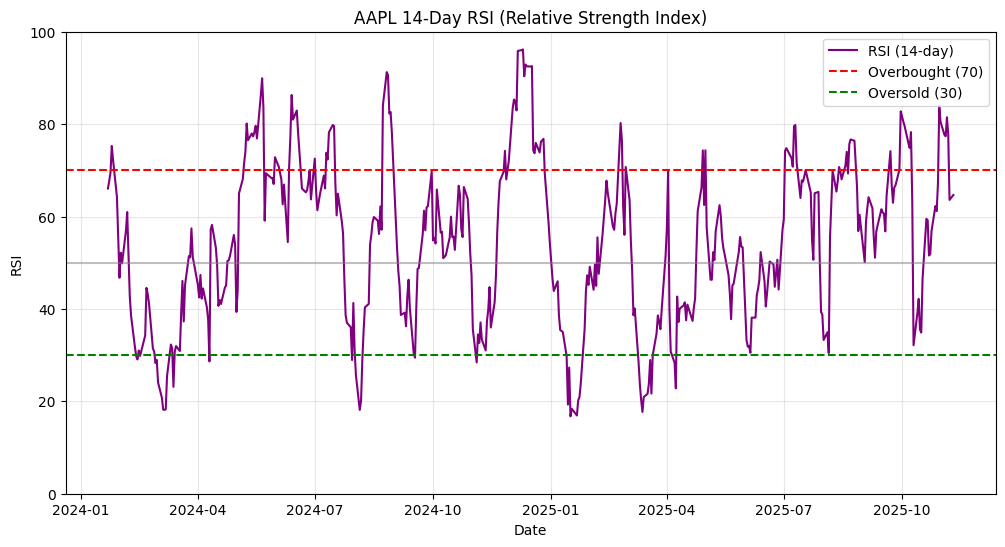

In [14]:
# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['RSI_14'], label='RSI (14-day)', color='purple')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.axhline(y=50, color='gray', linestyle='-', alpha=0.5)

plt.title('AAPL 14-Day RSI (Relative Strength Index)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)
plt.show()